<a href="https://colab.research.google.com/github/hartmannhn/demo_Fin7/blob/hartmannhn/Fin7_WIP_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from shutil import unpack_archive
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


#Import Data

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG' -O fintech.zip

unpack_archive('fintech.zip')

os.remove('fintech.zip')

--2022-07-14 17:23:53--  https://docs.google.com/uc?export=download&id=1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG
Resolving docs.google.com (docs.google.com)... 74.125.24.139, 74.125.24.113, 74.125.24.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ruvqgbjt6g6jacfa9ksn98sqfkcb1k9/1657819425000/14919976320250109613/*/1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG?e=download&uuid=c9d57f2b-1dc1-44d6-a12c-8e6fe33ab559 [following]
--2022-07-14 17:23:55--  https://doc-0s-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ruvqgbjt6g6jacfa9ksn98sqfkcb1k9/1657819425000/14919976320250109613/*/1-A9DplqY6rEDx4c7ZNXYmJHM4kS2TTvG?e=download&uuid=c9d57f2b-1dc1-44d6-a12c-8e6fe33ab559
Resolving doc-0s-54-docs.googleusercontent.com (doc-0s-54-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4003:

In [ ]:
#Import data train menjadi dataframe
df_train = pd.read_csv("train.csv", sep=';')
df_test = pd.read_csv("test.csv", sep=';')
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


pakai metode mas Yanuar utk drop duplicates

In [ ]:
df=pd.concat([df_train, df_test])
df.drop_duplicates(keep=False,inplace=True)
df_train = df
df_train.reset_index(drop=True, inplace=True)

In [ ]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Informasi dasar dari data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40690 entries, 0 to 40689
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40690 non-null  int64 
 1   job        40690 non-null  object
 2   marital    40690 non-null  object
 3   education  40690 non-null  object
 4   default    40690 non-null  object
 5   balance    40690 non-null  int64 
 6   housing    40690 non-null  object
 7   loan       40690 non-null  object
 8   contact    40690 non-null  object
 9   day        40690 non-null  int64 
 10  month      40690 non-null  object
 11  duration   40690 non-null  int64 
 12  campaign   40690 non-null  int64 
 13  pdays      40690 non-null  int64 
 14  previous   40690 non-null  int64 
 15  poutcome   40690 non-null  object
 16  y          40690 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.3+ MB


#EDA

##Data bilangan bulat

### Age

In [ ]:
#Statistik dasar dari data umur
df_train["age"].describe()

count    40690.000000
mean        40.910224
std         10.623291
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


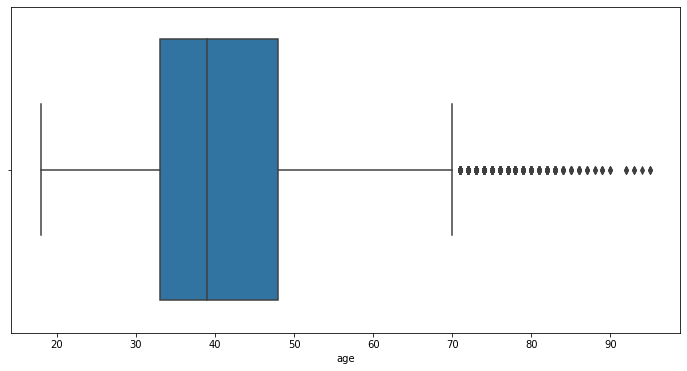

In [ ]:
#boxplot dari data umur
plt.figure(figsize=(12,6))
sns.boxplot(x = 'age', data = df_train, orient="v")
plt.show()

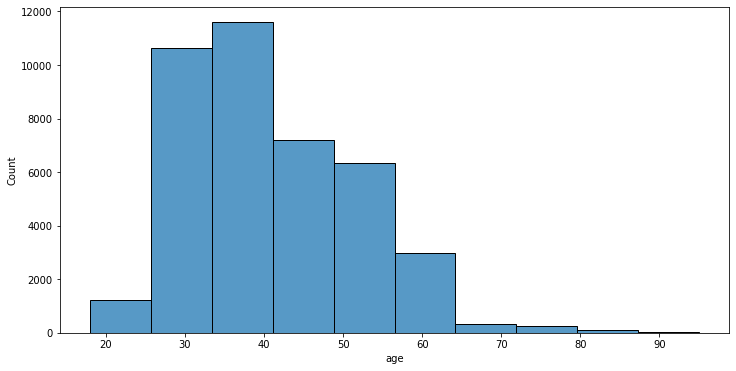

In [ ]:
#Histogram dari kategori umur
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="age", bins=10)
plt.show()

In [ ]:
#Berdasarkan dua plot diatas, ubah kelompok umur menjadi data kategori sesuai boxplot
def age(dataframe):
    '''subprogram untuk memetakan umur ke kategori berdasarkan kuartil dan data pencilan '''
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 39), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 39) & (dataframe['age'] <= 48), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 70), 'age'] = 4
    dataframe.loc[(dataframe['age'] > 70), 'age'] = 5

###Balance

In [ ]:
#Statistik dasar dari data umur
df_train["balance"].describe()

count     40690.000000
mean       1355.562694
std        3048.606598
min       -8019.000000
25%          73.000000
50%         449.000000
75%        1422.000000
max      102127.000000
Name: balance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


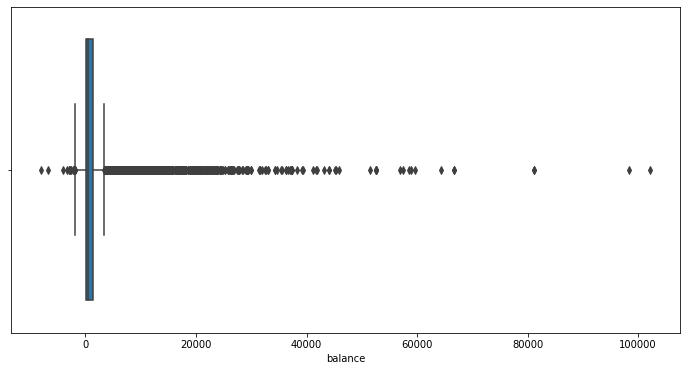

In [ ]:
#boxplot dari data balance
plt.figure(figsize=(12,6))
sns.boxplot(x = 'balance', data = df_train, orient="v")
plt.show()

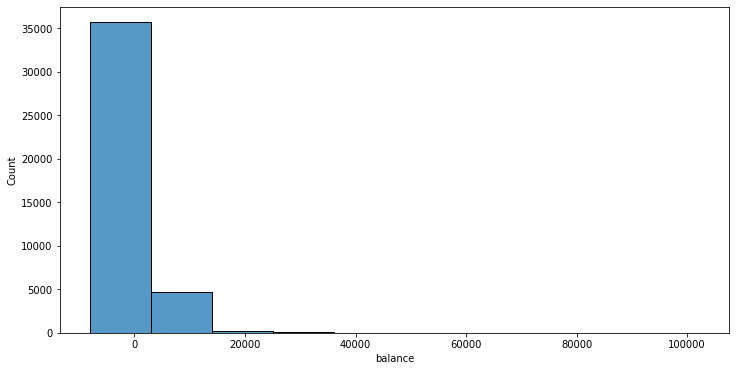

In [ ]:
#Histogram dari kategori balance
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="balance", bins=10)
plt.show()

###Day

In [ ]:
df_train['day'].describe()

count    40690.000000
mean        15.794323
std          8.330759
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
df_train["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

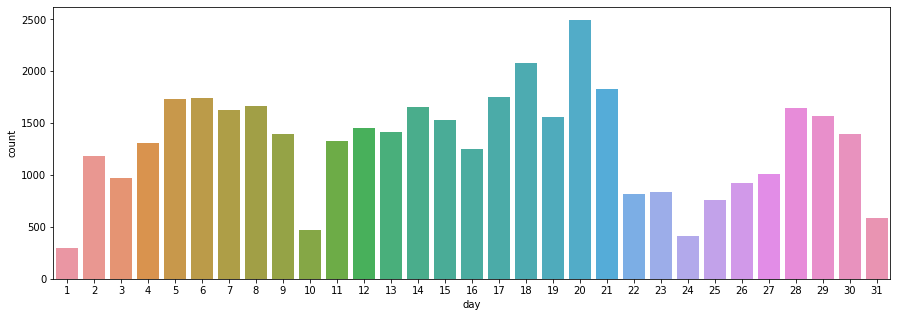

In [ ]:
#countplot untuk nilai day
plt.subplots(figsize = (15,5))
sns.countplot(x="day", data=df_train)
plt.show()

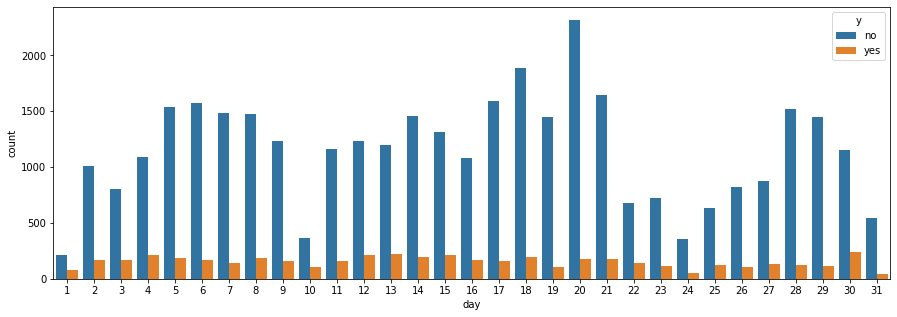

In [ ]:
#countplot untuk nilai day with y
plt.subplots(figsize = (15,5))
sns.countplot(x="day", hue='y', data=df_train)
plt.show()

###Duration

In [ ]:
df_train['duration'].describe()

count    40690.000000
mean       257.518850
std        257.262912
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


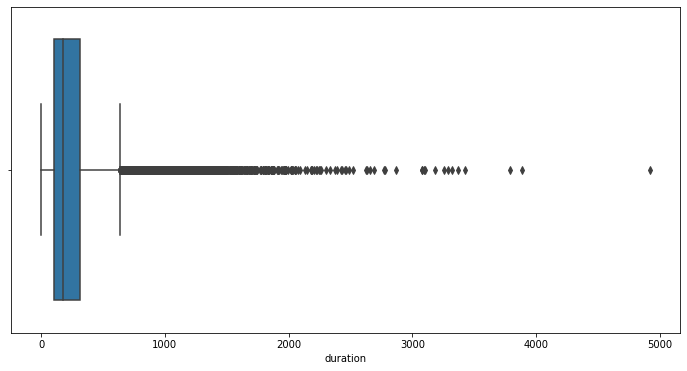

In [ ]:
#boxplot dari data duration
plt.figure(figsize=(12,6))
sns.boxplot(x = 'duration', data = df_train, orient="v")
plt.show()

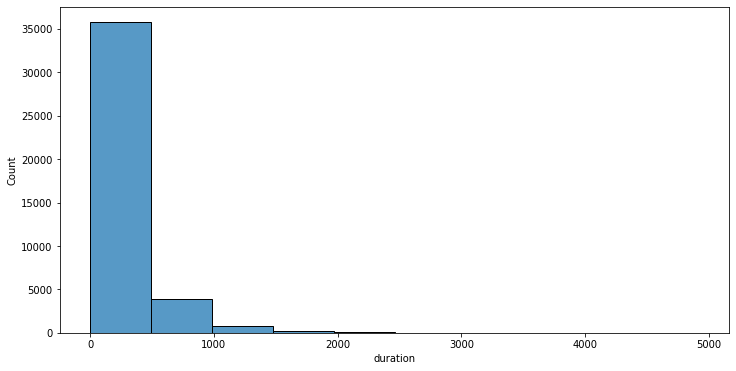

In [ ]:
#Histogram dari kategori duration
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="duration", bins=10)
plt.show()

###Campaign

In [ ]:
df_train["campaign"].describe()

count    40690.000000
mean         2.760531
std          3.096729
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


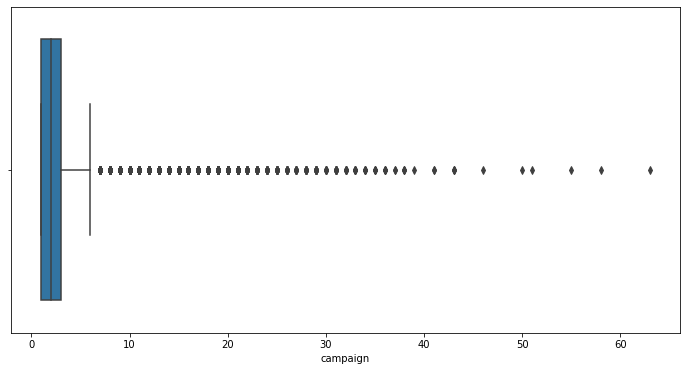

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'campaign', data = df_train, orient="v")
plt.show()

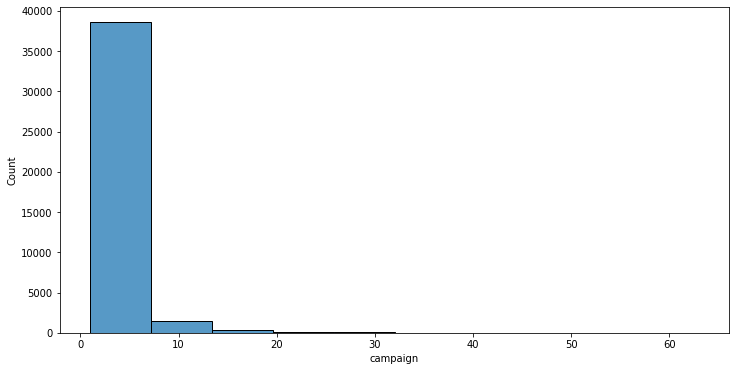

In [ ]:
#Histogram dari kategori duration
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="campaign", bins=10)
plt.show()

###Pdays

In [ ]:
df_train["pdays"].describe()

count    40690.000000
mean        40.245736
std        100.130708
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        854.000000
Name: pdays, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


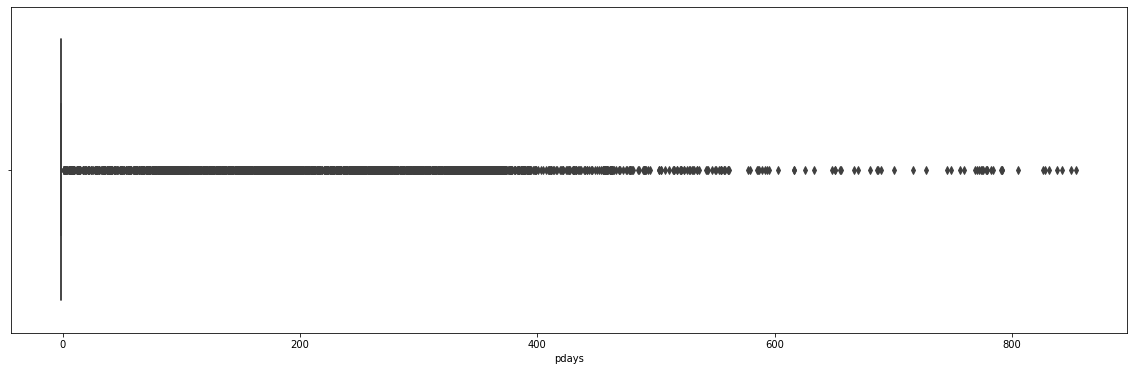

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'pdays', data = df_train, orient="v")
plt.show()

In [ ]:
df_train_pdaysneg = df_train[df_train['pdays']==-1]
df_train_pdaysneg

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
40683,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
40685,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
40686,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df_train_pdayspos = df_train[df_train['pdays']!=-1]
df_train_pdayspos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21608,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
21611,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
21618,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
21623,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
21626,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40679,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
40681,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
40684,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
40687,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df_train_pdayspos["pdays"].describe()

count    7441.000000
mean      224.546163
std       115.146584
min         1.000000
25%       132.000000
50%       195.000000
75%       327.000000
max       854.000000
Name: pdays, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


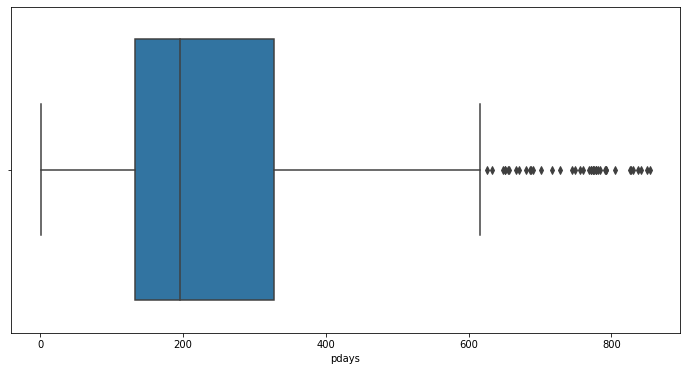

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'pdays', data = df_train_pdayspos, orient="v")
plt.show()

In [ ]:
def pdays(dataframe):
    dataframe.loc[dataframe['pdays'] == -1, 'pdays'] = 1
    dataframe.loc[(dataframe['pdays'] >= 0) & (dataframe['pdays'] <= 133), 'pdays'] = 2
    dataframe.loc[(dataframe['pdays'] > 133) & (dataframe['pdays'] <= 194), 'pdays'] = 3
    dataframe.loc[(dataframe['pdays'] > 194) & (dataframe['pdays'] <= 327), 'pdays'] = 4
    dataframe.loc[dataframe['pdays'] > 327, 'pdays'] = 5

###Previous

In [ ]:
df_train["previous"].describe()

count    40690.000000
mean         0.584517
std          2.361480
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


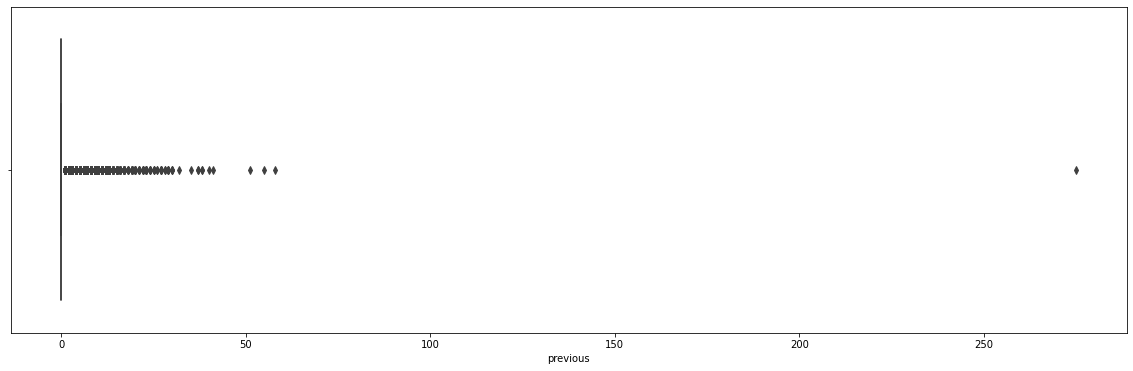

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'previous', data = df_train, orient="v")
plt.show()

In [ ]:
df_train_previous0 = df_train[df_train['previous']==0]
df_train_previous0

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
40683,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
40685,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
40686,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
df_train_previouspos = df_train[df_train['previous']!=0]
df_train_previouspos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21608,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
21611,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
21618,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
21623,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
21626,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40679,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
40681,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
40684,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
40687,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df_train_previouspos["previous"].describe()

count    7441.000000
mean        3.196345
std         4.706238
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       275.000000
Name: previous, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


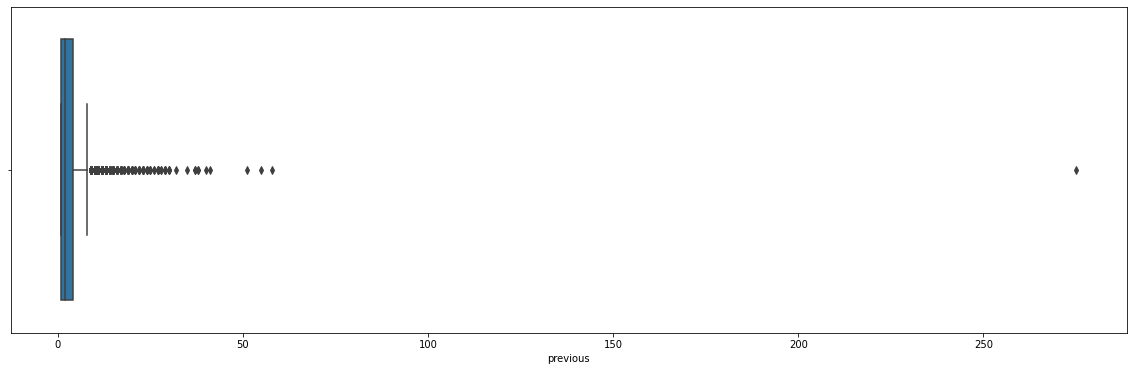

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'previous', data = df_train_previouspos, orient="v")
plt.show()

In [ ]:
def previous(dataframe):
    dataframe.loc[dataframe['previous'] == 0, 'previous'] = 1
    dataframe.loc[dataframe['previous'] == 1, 'previous'] = 2
    dataframe.loc[dataframe['previous'] == 2, 'previous'] = 3
    dataframe.loc[(dataframe['previous'] > 2) & (dataframe['previous'] <= 4), 'previous'] = 4
    dataframe.loc[dataframe['previous'] > 4, 'previous'] = 5

coba klasifikasikan "previous" menjadi binary pernah di coba tawari atau tidak

In [ ]:
"""
def previous(dataframe):
    dataframe.loc[dataframe['previous'] == 0, 'previous'] = 1
    dataframe.loc[dataframe['previous'] > 0 , 'previous'] = 2
"""

"\ndef previous(dataframe):\n    dataframe.loc[dataframe['previous'] == 0, 'previous'] = 1\n    dataframe.loc[dataframe['previous'] > 0 , 'previous'] = 2\n"

##Data Kategori

###Job

In [ ]:
df_train["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

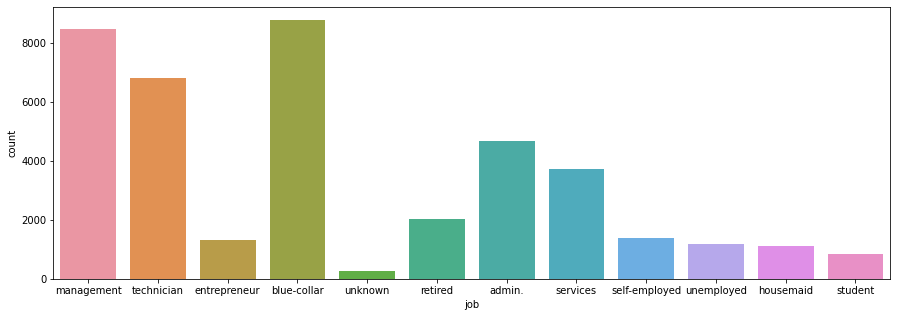

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job", data=df_train)
plt.show()

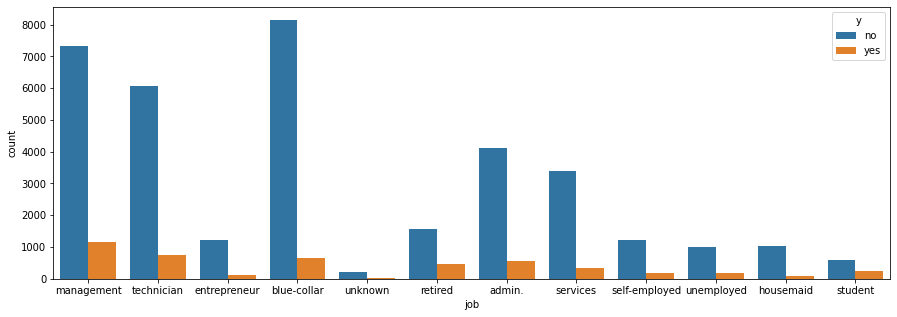

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job",hue="y", data=df_train)
plt.show()

In [ ]:
def ubahjobtoint(df):
  df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

###Marital

In [ ]:
df_train["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

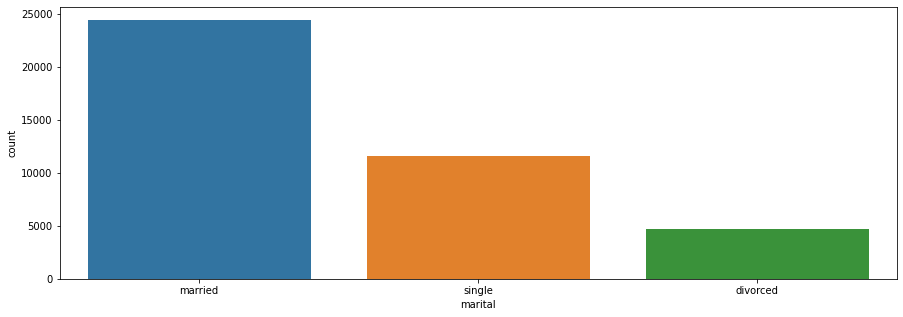

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="marital", data=df_train)
plt.show()

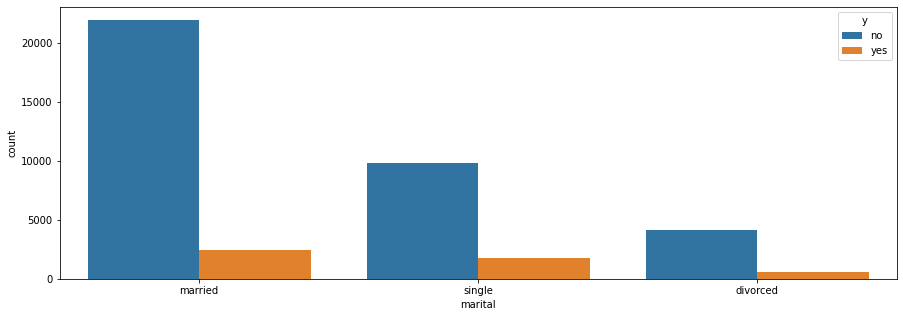

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="marital",hue="y", data=df_train)
plt.show()

###Education

In [ ]:
df_train["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

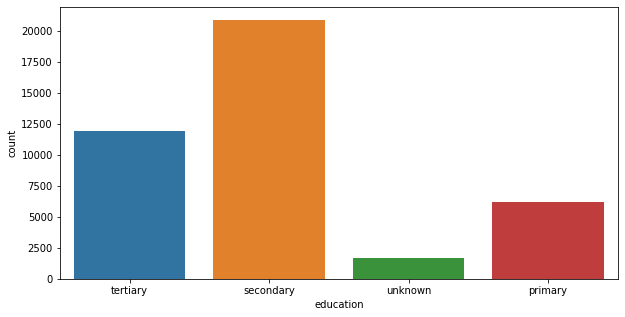

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="education", data=df_train)
plt.show()

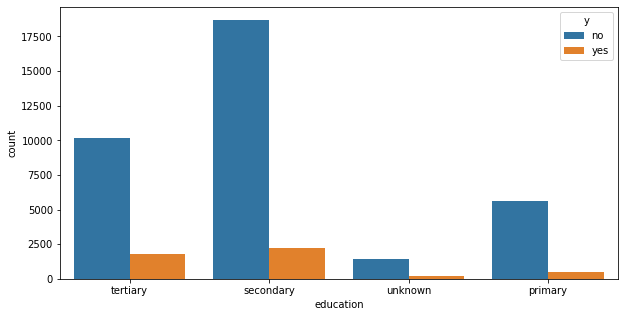

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="education",hue="y", data=df_train)
plt.show()

###Default

In [ ]:
df_train["default"].unique()

array(['no', 'yes'], dtype=object)

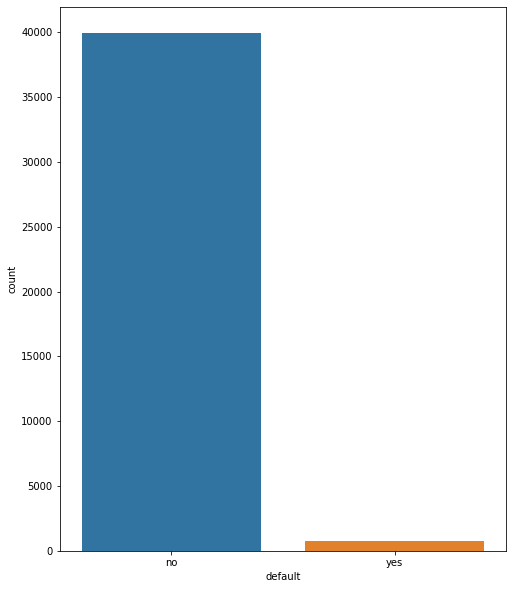

In [ ]:
plt.subplots(figsize = (8,10))
sns.countplot(x="default", data=df_train)
plt.show()

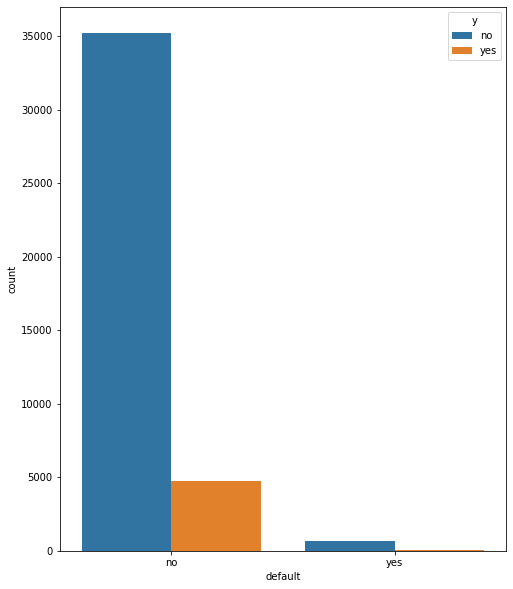

In [ ]:
plt.subplots(figsize = (8,10))
sns.countplot(x="default",hue="y", data=df_train)
plt.show()

###Housing

In [ ]:
df_train["housing"].unique()


array(['yes', 'no'], dtype=object)

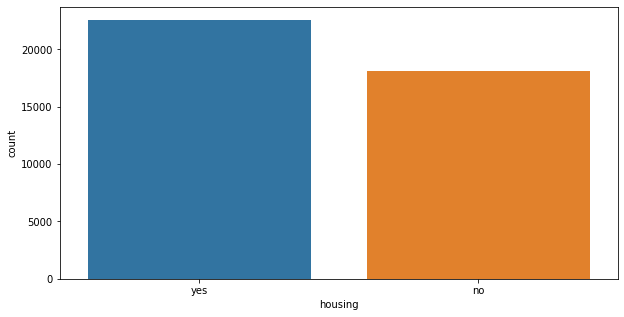

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="housing", data=df_train)
plt.show()

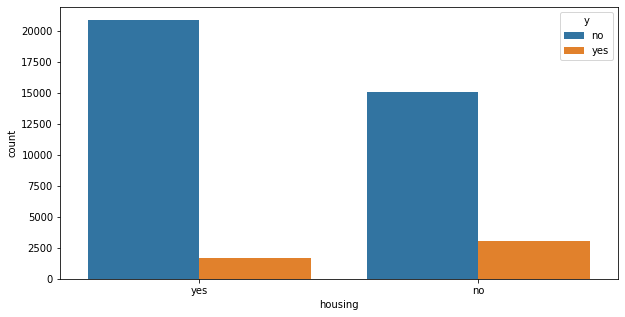

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="housing",hue="y", data=df_train)
plt.show()

###Loan

In [ ]:
df_train["loan"].unique()

array(['no', 'yes'], dtype=object)

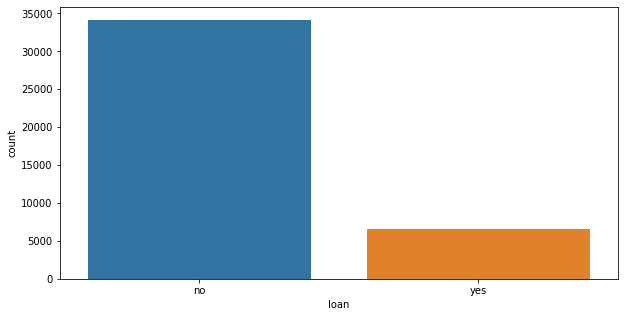

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="loan", data=df_train)
plt.show()

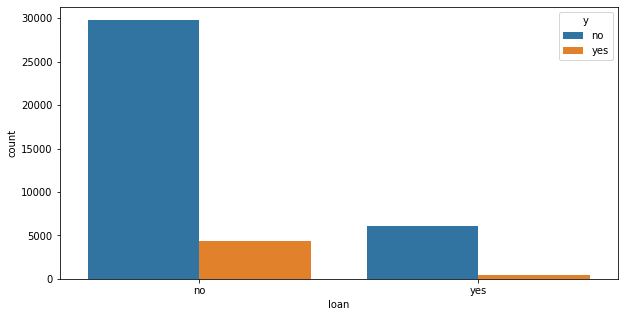

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="loan",hue="y", data=df_train)
plt.show()

###Contact

In [ ]:
df_train["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

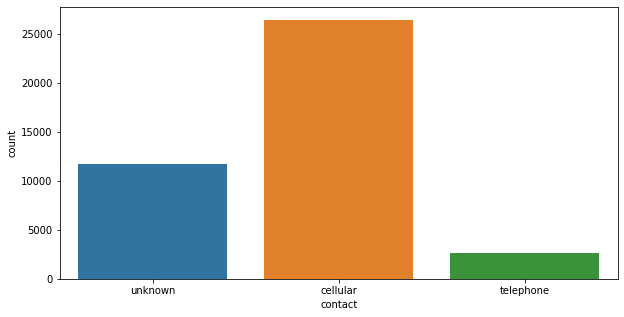

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="contact", data=df_train)
plt.show()

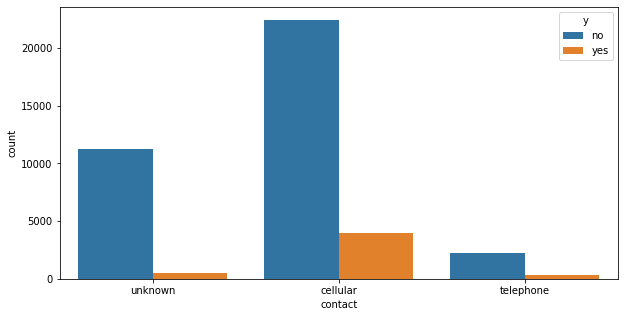

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="contact",hue="y", data=df_train)
plt.show()

###Month

In [ ]:
df_train["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

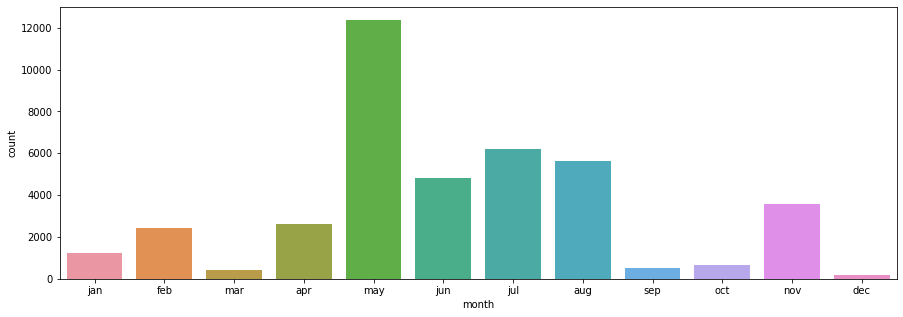

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x="month", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

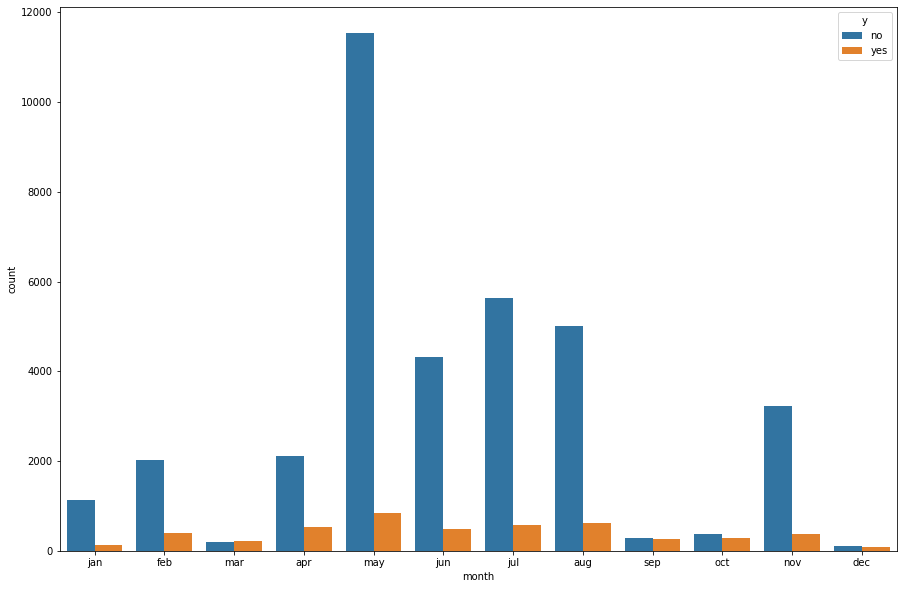

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(x="month",hue="y", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

In [ ]:
def ubahmonthtoint(df):
  df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'] , [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9], inplace=True)

###Poutcome

In [ ]:
df_train["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

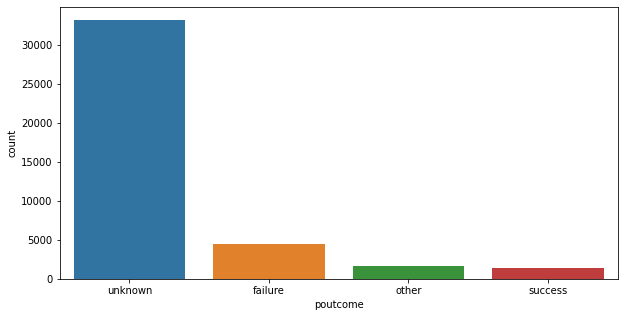

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="poutcome", data=df_train)
plt.show()

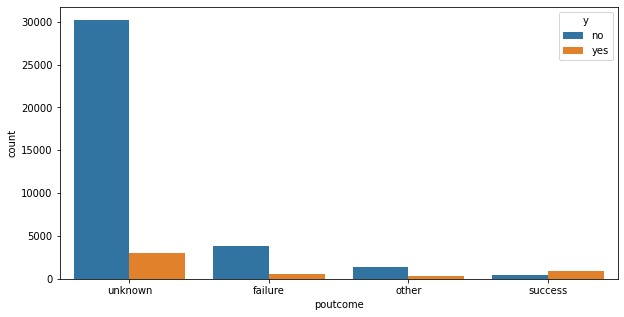

In [ ]:
plt.subplots(figsize = (10,5))
sns.countplot(x="poutcome",hue="y", data=df_train)
plt.show()

###y

In [ ]:
df_train["y"].unique()

array(['no', 'yes'], dtype=object)

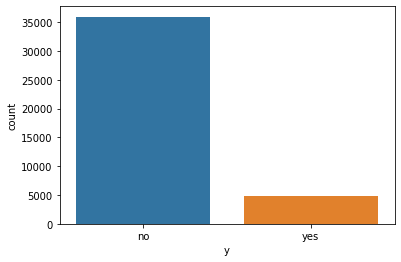

In [ ]:
sns.countplot(x="y", data=df_train)

## Scaling Train Data

In [ ]:
"""
def preprocesint(df):
  df['balance'] = df['balance'].agg(lambda x :(x-x.mean())/(x.std()))   #standardscaler
  df['duration'] = df['duration'].agg(lambda x :(x-x.mean())/(x.std())) #standardscaler
  df['campaign'] = df['campaign'].agg(lambda x :(x-x.mean())/(x.std())) #standardscaler
  age(df)
  pdays(df)
  previous(df)
  #ubahjobtoint(df) #kalo ujungnya di one-hot, ya gk perlu diubah ke int
  ubahmonthtoint(df)
"""

"\ndef preprocesint(df):\n  df['balance'] = df['balance'].agg(lambda x :(x-x.mean())/(x.std()))   #standardscaler\n  df['duration'] = df['duration'].agg(lambda x :(x-x.mean())/(x.std())) #standardscaler\n  df['campaign'] = df['campaign'].agg(lambda x :(x-x.mean())/(x.std())) #standardscaler\n  age(df)\n  pdays(df)\n  previous(df)\n  #ubahjobtoint(df) #kalo ujungnya di one-hot, ya gk perlu diubah ke int\n  ubahmonthtoint(df)\n"

standard scaler idealnya dipakai buat dataset yang memenuhi kriteria distribusi normal, jadi harusnya kalo tidak yakin distribusi normal ya tidak pakai standard scaler atau perlu dinormalisasi dahulu datanya.

selain itu, transform data pada train data harusnya diterapkan sama ke test data, karena mean dan std train dan test berbeda sehingga range tidak sama saat train dan predict nantinya.

solusinya pakai sklearn.preprocessing, ada standardscaler dan minmaxscaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# scaling balance try Minmax
balance_scaler = MinMaxScaler()
df_train['balance'] = pd.DataFrame(balance_scaler.fit_transform(pd.DataFrame(df_train['balance'])),columns=['balance'])

# scaling duration try Minmax
duration_scaler = MinMaxScaler()
df_train['duration'] = pd.DataFrame(duration_scaler.fit_transform(pd.DataFrame(df_train['duration'])),columns=['duration'])

# scaling campaign try Minmax
campaign_scaler = MinMaxScaler()
df_train['campaign'] = pd.DataFrame(campaign_scaler.fit_transform(pd.DataFrame(df_train['campaign'])),columns=['campaign'])

# scaling age try Minmax
age_scaler = MinMaxScaler()
df_train['age'] = pd.DataFrame(age_scaler.fit_transform(pd.DataFrame(df_train['age'])),columns=['age'])

#tetap pakai cara mas Yanuar karena ada makna untuk -1, jadi lebih baik dikategorikan saja
pdays(df_train)

# scaling previous try Minmax
previous_scaler = MinMaxScaler()
df_train['previous'] = pd.DataFrame(previous_scaler.fit_transform(pd.DataFrame(df_train['previous'])),columns=['previous'])

# scaling month try Minmax
ubahmonthtoint(df_train)
month_scaler = MinMaxScaler()
df_train['month'] = pd.DataFrame(month_scaler.fit_transform(pd.DataFrame(df_train['month'])),columns=['month'])

# scaling day try Minmax
day_scaler = MinMaxScaler()
df_train['day'] = pd.DataFrame(day_scaler.fit_transform(pd.DataFrame(df_train['day'])),columns=['day'])


In [ ]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,0.363636,0.053070,0.000000,2,0.000000,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,0.363636,0.030704,0.000000,2,0.000000,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,0.363636,0.015453,0.000000,2,0.000000,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,0.363636,0.018707,0.000000,2,0.000000,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,0.363636,0.040260,0.000000,2,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,0.533333,0.909091,0.198658,0.032258,2,0.000000,unknown,yes
40686,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,0.533333,0.909091,0.092721,0.016129,2,0.000000,unknown,yes
40687,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,0.533333,0.909091,0.229158,0.064516,3,0.010909,success,yes
40688,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,0.533333,0.909091,0.103294,0.048387,2,0.000000,unknown,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40690 entries, 0 to 40689
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40690 non-null  float64
 1   job        40690 non-null  object 
 2   marital    40690 non-null  object 
 3   education  40690 non-null  object 
 4   default    40690 non-null  object 
 5   balance    40690 non-null  float64
 6   housing    40690 non-null  object 
 7   loan       40690 non-null  object 
 8   contact    40690 non-null  object 
 9   day        40690 non-null  float64
 10  month      40690 non-null  float64
 11  duration   40690 non-null  float64
 12  campaign   40690 non-null  float64
 13  pdays      40690 non-null  int64  
 14  previous   40690 non-null  float64
 15  poutcome   40690 non-null  object 
 16  y          40690 non-null  object 
dtypes: float64(7), int64(1), object(9)
memory usage: 5.3+ MB


##Oversample

In [ ]:
"""
a = df_train[df_train["y"] == "yes"].shape
b = df_train[df_train["y"] == "no"].shape
while b[0]/a[0] > 1.2:
  df_random = df_train[df_train["y"] == "yes"].sample(frac=0.5)
  df_train = pd.concat([df_train, df_random])
  a = df_train[df_train["y"] == "yes"].shape
"""

'\na = df_train[df_train["y"] == "yes"].shape\nb = df_train[df_train["y"] == "no"].shape\nwhile b[0]/a[0] > 1.2:\n  df_random = df_train[df_train["y"] == "yes"].sample(frac=0.5)\n  df_train = pd.concat([df_train, df_random])\n  a = df_train[df_train["y"] == "yes"].shape\n'

In [ ]:
# df_train.reset_index(drop=True, inplace=True)

In [ ]:
# a = df_train[df_train["y"] == "yes"].shape
# a[0]

#Train Data

In [ ]:
df = pd.get_dummies(df_train, columns=['job','loan','poutcome','contact','education','marital','default','housing','pdays'], drop_first=True)
df

,age,balance,day,month,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,...,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,no,0,0,...,0,1,0,1,0,0,1,0,0,0
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,no,0,0,...,1,0,0,0,1,0,1,0,0,0
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,no,0,1,...,1,0,0,1,0,0,1,0,0,0
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,no,1,0,...,0,0,1,1,0,0,1,0,0,0
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,no,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,yes,0,0,...,0,1,0,1,0,0,0,0,0,0
40686,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,yes,0,0,...,0,0,0,0,0,0,0,0,0,0
40687,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.010909,yes,0,0,...,1,0,0,1,0,0,0,1,0,0
40688,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,no,1,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
label = df['y'].replace(['no', 'yes'],[0,1])
# y = df['y'].replace(['no', 'yes'],[0,1])
y = np_utils.to_categorical(label, 2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
X = df.drop(['y'], axis=1)
X

,age,balance,day,month,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0.376623,0.086476,0.133333,0.363636,0.018707,0.000000,0.000000,1,0,0,...,0,0,1,1,0,0,1,0,0,0
4,0.194805,0.072812,0.133333,0.363636,0.040260,0.000000,0.000000,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40685,0.428571,0.080293,0.533333,0.909091,0.198658,0.032258,0.000000,0,0,0,...,0,1,0,1,0,0,0,0,0,0
40686,0.688312,0.088501,0.533333,0.909091,0.092721,0.016129,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40687,0.701299,0.124689,0.533333,0.909091,0.229158,0.064516,0.010909,0,0,0,...,1,0,0,1,0,0,0,1,0,0
40688,0.506494,0.078868,0.533333,0.909091,0.103294,0.048387,0.000000,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
df_train['age'].count()

40690

In [ ]:
size=X.shape[1]
size

34

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=85, stratify=y)

## Class Weights

In [ ]:
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced',
                                                 y=y_train)
# class_weight_dict = dict(enumerate(class_weights))
sample_weights

array([0.3207759, 0.3207759, 0.3207759, ..., 0.3207759, 0.3207759,
       0.3207759])

## Modelling

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(size,)),
        tf.keras.layers.Dense(size*3, activation='relu'),
        BatchNormalization(),
        tf.keras.layers.Dense(size*6, activation='relu'),
        BatchNormalization(),                           
        tf.keras.layers.Dense(size*12, activation='relu'),
        BatchNormalization(),
        tf.keras.layers.Dense(size*24, activation='relu'),
        BatchNormalization(),

        # berdasar referensi, antara sigmoid dan softmax
        # bisa pakai Dense(2, activation='softmax')
        # atau pakai Dense(1, activation='sigmoid')

        # tf.keras.layers.Dense(2, activation='softmax')])
        tf.keras.layers.Dense(2, activation='sigmoid')])
        # tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 102)               3570      
                                                                 
 batch_normalization (BatchN  (None, 102)              408       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 204)               21012     
                                                                 
 batch_normalization_1 (Batc  (None, 204)              816       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 408)               83640     
                                                                 
 batch_normalization_2 (Batc  (None, 408)              1

## Model Compile and Callbacks

In [ ]:
# karena variabel y nya dibuat categorical, ya run model nya juga categorical, bukan binary lagi
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# callback to stop train when accuracy and val_accuracy is high already
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('categorical_accuracy')>.95 and logs.get('val_categorical_accuracy')>.95):
      self.model.stop_training=True

# callback to stop train when model start showing sign of overfitting
earlystop = EarlyStopping(monitor='val_loss',mode = "min", min_delta=0.0001, patience=300,restore_best_weights=True)

# callback to save best model to retrieve when train stop
mc = ModelCheckpoint('best_model.h5', monitor='val_categorical_accuracy', mode='max', verbose=1, save_best_only=True)

callback_list = [earlystop, mc, myCallback()]


In [ ]:
history = model.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   epochs=500, batch_size=256, verbose=1,callbacks=callback_list, sample_weight=sample_weights)

print('History of the training',history.history)

Epoch 1/500
128/136 [===========================>..] - ETA: 0s - loss: 1.0347 - categorical_accuracy: 0.4470
Epoch 1: val_categorical_accuracy improved from -inf to 0.15760, saving model to best_model.h5
136/136 [==============================] - 3s 8ms/step - loss: 1.0159 - categorical_accuracy: 0.4443 - val_loss: 0.9343 - val_categorical_accuracy: 0.1576
Epoch 2/500
131/136 [===========================>..] - ETA: 0s - loss: 0.6144 - categorical_accuracy: 0.4397
Epoch 2: val_categorical_accuracy improved from 0.15760 to 0.48378, saving model to best_model.h5
136/136 [==============================] - 1s 7ms/step - loss: 0.6132 - categorical_accuracy: 0.4407 - val_loss: 0.8682 - val_categorical_accuracy: 0.4838
Epoch 3/500
133/136 [============================>.] - ETA: 0s - loss: 0.5428 - categorical_accuracy: 0.4943
Epoch 3: val_categorical_accuracy did not improve from 0.48378
136/136 [==============================] - 1s 6ms/step - loss: 0.5431 - categorical_accuracy: 0.4947 - val_

In [ ]:
savedmodel = load_model('best_model.h5')

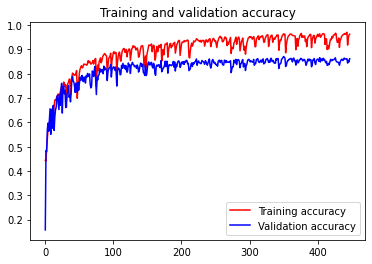

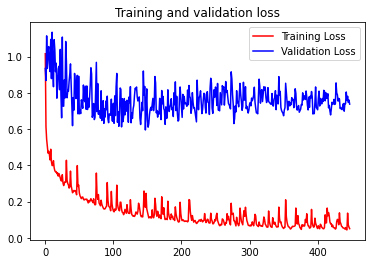

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
# acc = history.history['accuracy']
acc = history.history['categorical_accuracy']
# acc = history.history['binary_accuracy']

# val_acc = history.history['val_accuracy']
val_acc = history.history['val_categorical_accuracy']
# val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


#Test Data

In [ ]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## Scaling Test Data

In [ ]:
# scaling balance try Minmax
df_test['balance'] = pd.DataFrame(balance_scaler.transform(pd.DataFrame(df_test['balance'])),columns=['balance'])

# scaling duration try Minmax
df_test['duration'] = pd.DataFrame(duration_scaler.transform(pd.DataFrame(df_test['duration'])),columns=['duration'])

# scaling campaign try Minmax
df_test['campaign'] = pd.DataFrame(campaign_scaler.transform(pd.DataFrame(df_test['campaign'])),columns=['campaign'])

# scaling age try Minmax
df_test['age'] = pd.DataFrame(age_scaler.transform(pd.DataFrame(df_test['age'])),columns=['age'])

#tetap pakai cara mas Yanuar karena ada makna untuk -1, jadi lebih baik dikategorikan saja
pdays(df_test)

# scaling previous try Minmax
df_test['previous'] = pd.DataFrame(previous_scaler.transform(pd.DataFrame(df_test['previous'])),columns=['previous'])

# scaling month try Minmax
ubahmonthtoint(df_test)
df_test['month'] = pd.DataFrame(month_scaler.transform(pd.DataFrame(df_test['month'])),columns=['month'])

# scaling day try Minmax
df_test['day'] = pd.DataFrame(day_scaler.transform(pd.DataFrame(df_test['day'])),columns=['day'])


In [ ]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.155844,unemployed,married,primary,no,0.089027,no,no,cellular,0.600000,0.818182,0.016063,0.000000,2,0.000000,unknown,no
1,0.194805,services,married,secondary,no,0.116282,yes,yes,cellular,0.333333,0.363636,0.044734,0.000000,5,0.014545,failure,no
2,0.220779,management,single,tertiary,no,0.085060,yes,no,cellular,0.500000,0.272727,0.037617,0.000000,5,0.003636,failure,no
3,0.155844,management,married,tertiary,no,0.086204,yes,yes,unknown,0.066667,0.454545,0.040464,0.048387,2,0.000000,unknown,no
4,0.532468,blue-collar,married,secondary,no,0.072803,yes,no,unknown,0.133333,0.363636,0.045954,0.000000,2,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.194805,services,married,secondary,no,0.069780,yes,no,cellular,0.966667,0.545455,0.066897,0.064516,2,0.000000,unknown,no
4517,0.506494,self-employed,married,tertiary,yes,0.042725,yes,yes,unknown,0.266667,0.363636,0.031110,0.000000,2,0.000000,unknown,no
4518,0.506494,technician,married,secondary,no,0.075482,no,no,cellular,0.600000,0.636364,0.030704,0.161290,2,0.000000,unknown,no
4519,0.129870,blue-collar,married,secondary,no,0.083126,no,no,cellular,0.166667,0.090909,0.026230,0.048387,4,0.010909,other,no


In [ ]:
dftestdum = pd.get_dummies(df_test, columns=['job','loan','poutcome','contact','education','marital','default','housing','pdays'], drop_first=True)

In [ ]:
labels = dftestdum['y'].replace(['no', 'yes'],[0,1])
# Y = dftestdum['y'].replace(['no', 'yes'],[0,1])
Y = np_utils.to_categorical(labels, 2)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Xtest = dftestdum.drop(['y'], axis=1)
Xtest

,age,balance,day,month,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5
0,0.155844,0.089027,0.600000,0.818182,0.016063,0.000000,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.194805,0.116282,0.333333,0.363636,0.044734,0.000000,0.014545,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0.220779,0.085060,0.500000,0.272727,0.037617,0.000000,0.003636,0,0,0,...,0,1,0,0,1,0,1,0,0,1
3,0.155844,0.086204,0.066667,0.454545,0.040464,0.048387,0.000000,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,0.532468,0.072803,0.133333,0.363636,0.045954,0.000000,0.000000,1,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.194805,0.069780,0.966667,0.545455,0.066897,0.064516,0.000000,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4517,0.506494,0.042725,0.266667,0.363636,0.031110,0.000000,0.000000,0,0,0,...,0,1,0,1,0,1,1,0,0,0
4518,0.506494,0.075482,0.600000,0.636364,0.030704,0.161290,0.000000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4519,0.129870,0.083126,0.166667,0.090909,0.026230,0.048387,0.010909,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
Y_predict=savedmodel.predict(Xtest)
Ypred=np.argmax(Y_predict, axis=1)
Ytes=np.argmax(Y, axis=1)

In [ ]:
cm = confusion_matrix(Ytes, Ypred)
cm

array([[3619,  381],
       [ 232,  289]])

In [ ]:
TN, FP, FN, TP = cm.ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  289
False Positive(FP) =  381
True Negative(TN)  =  3619
False Negative(FN) =  232


In [ ]:
print(classification_report(Ytes, Ypred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4000
           1       0.43      0.55      0.49       521

    accuracy                           0.86      4521
   macro avg       0.69      0.73      0.70      4521
weighted avg       0.88      0.86      0.87      4521

